In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# import cv2
# import math
# from numpy.fft import fft2, fftshift, ifft2 # Python DFT

In [29]:
def equalise_histogram(img, elements, frequency):
    
    cumu_freq = np.zeros((len(frequency),),dtype=int)
    output = np.zeros((len(frequency),),dtype=int)
    new_pixelmap = np.zeros((img.width, img.height), dtype=int)
    
    levels = len(frequency) -1
    size = img.width * img.height
    
    cumu_freq[0]= frequency[0]
    val = round((levels/size)* cumu_freq[0])
    output[0] = val
    
    for i in range(1,len(frequency)):
        cumu_freq[i]= frequency[i] + cumu_freq[i-1]
        val = round((levels/size)* cumu_freq[i])
        output[i] = val
    
    w,h = img.size
    pixelmap = img.load()

    
    for i in range(0,w):
        for j in range(0,h):
            val = pixelmap[i,j]
            index = elements.index(val)
            new_pixelmap[i][j] += output[index]
        
        plt.gray()
        plt.imshow(np.rot90(new_pixelmap), cmap='gray',origin='lower')
        plt.yticks([])
        plt.xticks([])
        plt.show()

    return output         
    

In [30]:
def normal_histogram(img):    
    pixelmap = list(img.getdata())
    elements = list(set(pixelmap))
    
    frequency = np.zeros((len(elements),),dtype=int)
  
    for i in range(len(elements)):   
        val = pixelmap.count(elements[i])
        frequency[i] = val
    frequency= list(frequency)
    return elements, frequency

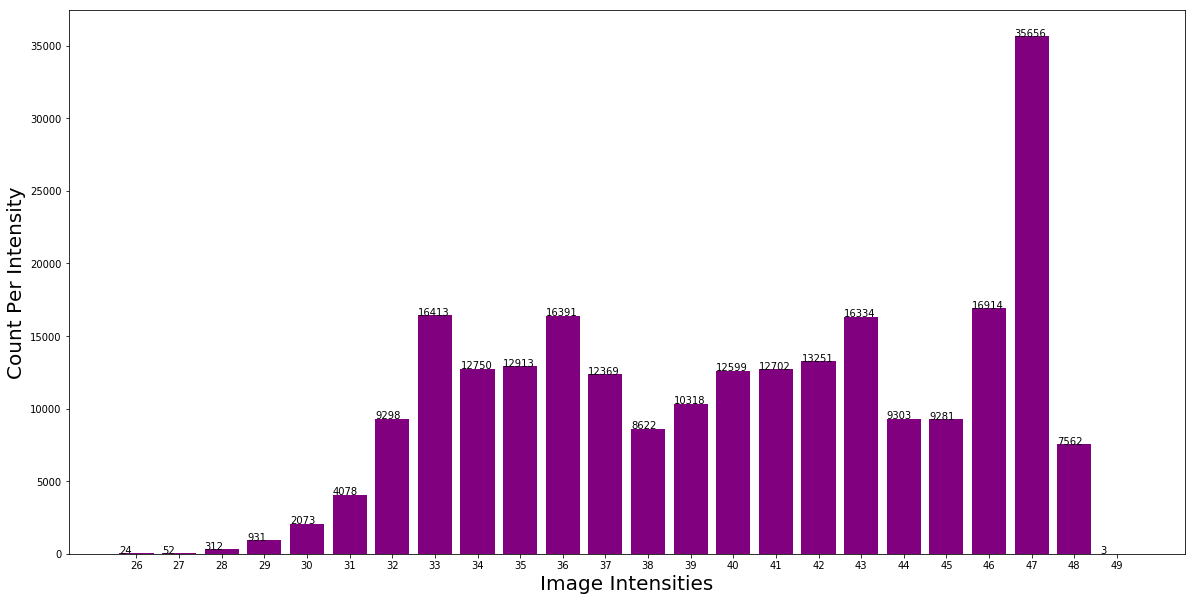

In [32]:
image = Image.open('Sphinx.png')
new_img = image.copy()
elements, normal_vector = normal_histogram(new_img)

figure, axes = plt.subplots(figsize=(20, 10))

axes.bar(elements,normal_vector, width=0.8, tick_label = elements, color= 'purple')
axes.set_ylabel('Count Per Intensity',size=20)
axes.set_xlabel('Image Intensities', size=20)
for i, v in enumerate(normal_vector):
      plt.text(elements[i]-0.4, v+0.01, str(v))

#figure.savefig('Before_Eq.jpg')

elements:  [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
output:  [ 0  0  0  0  0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 19 22 23 23]


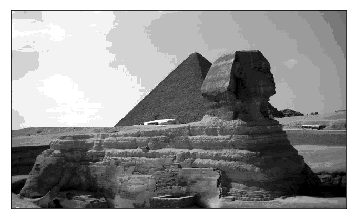

In [28]:
equalised_vector = equalise_histogram(new_img, elements, normal_vector)
print("elements: ", elements)
print("output: ", equalised_vector)

xaxis [ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 19 22 23]
yaxis [ 3392  4078  9298 16413 12750 12913 16391 12369  8622 10318 12599 12702
 13251 16334  9303  9281 16914 35656  7565]


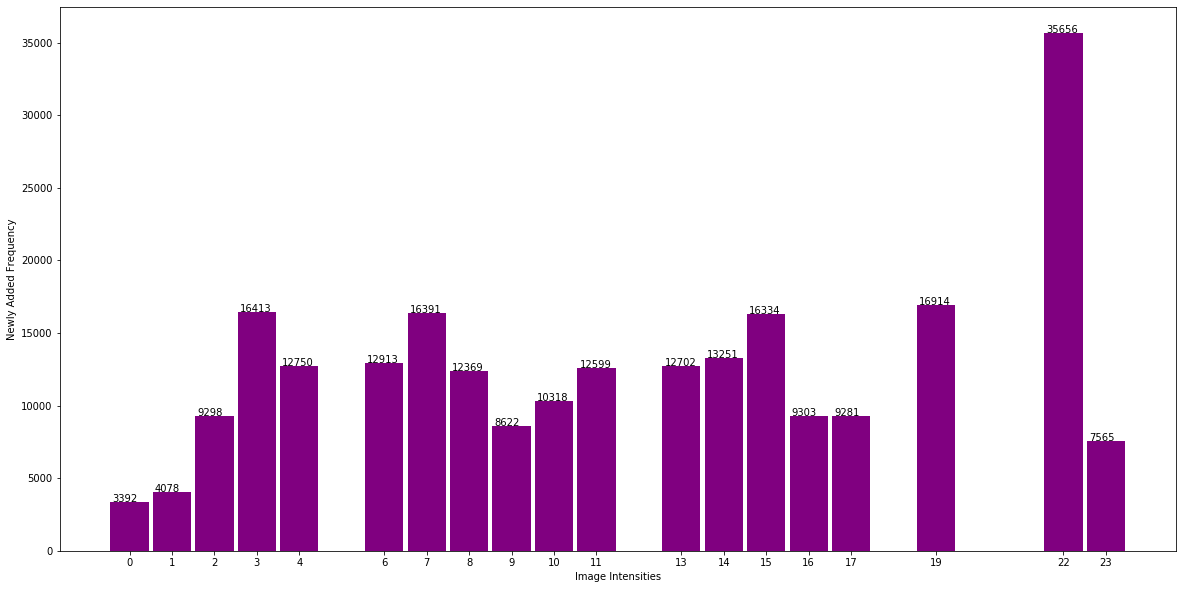

In [6]:
def plot_eq_histogram(normal_vector, equalised_vector):
    xaxis = np.unique(equalised_vector)
    yaxis= np.zeros((len(xaxis)), dtype = int)
                    
    for index in range(0,equalised_vector.shape[0]):
        
        x_value = equalised_vector[index]
        added_freq = normal_vector[index]
        y_index = np.where(xaxis == x_value)
        yaxis[y_index]+= added_freq
        
    print("xaxis", xaxis)
    print("yaxis", yaxis)
        
    figure, axes = plt.subplots(figsize=(20, 10))

    axes.bar(xaxis,yaxis, width=0.9, tick_label = xaxis, color= 'purple')
    axes.set_ylabel('Newly Added Frequency',size=10)
    axes.set_xlabel('Image Intensities', size=10)
    for i, v in enumerate(yaxis):
          plt.text(xaxis[i]-0.4, v+0.01, str(v))   
    #plt.savefig('After_Eq.jpg')

plot_eq_histogram(normal_vector,equalised_vector )

        

In [7]:
def applyHighBoost(A,n,img,D0,fileName):
    
    f = np.fft.fftshift(img)
    magnitude_spectrum= np.fft.fft2(f)
    
    highBoostFilter=np.zeros((magnitude_spectrum.shape[0], magnitude_spectrum.shape[1]))

    Mdivided2 = int(magnitude_spectrum.shape[0]/2)
    Ndivided2 = int(magnitude_spectrum.shape[1]/2)

    for i in range(0,magnitude_spectrum.shape[0]):
        for j in range(0,magnitude_spectrum.shape[1]):

            distanceDUV = math.sqrt(math.pow((i-Mdivided2),2) + math.pow((j-Ndivided2),2))
            if(i==Mdivided2 and j==Ndivided2):
                highPathButterWorth = 1
            else:
                highPathButterWorth = 1 / ( 1 + (math.pow(( D0 / distanceDUV),(2*n))))

            highBoostVal = highPathButterWorth + (A-1)

            # HIGH BOOST FILTER VALUES 
            highBoostFilter[i][j]= highBoostVal
   
    m = magnitude_spectrum * highBoostFilter
    
    imageArray=np.fft.ifft2(m) 

    imageArray=imageArray.real

    imageArrayshift=np.fft.ifftshift(imageArray)
    
    cv2.imwrite(fileName+'.jpg', imageArrayshift) 

       
    return 

In [8]:
img = cv2.imread('Moon.jpg',0)
applyHighBoost(2,2,img,50,'moon1')

In [9]:
img = cv2.imread('Moon.jpg',0)
applyHighBoost(2,1,img,50,'moon2')

In [10]:
img = cv2.imread('Moon.jpg',0)
applyHighBoost(1.5,1,img,50,'moon3')